In [1]:
#Import data

import pandas as pd
import numpy  as np

train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
#sessions = pd.read_csv('sessions.csv')


In [2]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder

#Encode labels
labels = train_users.pop('country_destination')
le = LabelEncoder()
train_labels = le.fit_transform(labels) 

#Create dummies for training set
df_train =  pd.get_dummies(train_users[['gender','signup_method','language',
                                  'affiliate_channel','affiliate_provider',
                                  'signup_app','first_device_type']])

df_train.set_index(train_users['id'], inplace=True)

#Create dummies for test set
df_test =  pd.get_dummies(test_users[['gender','signup_method','language',
                                  'affiliate_channel','affiliate_provider',
                                  'signup_app','first_device_type']])

df_test.set_index(test_users['id'], inplace = True)

In [3]:
#Some categorical features exist in the training set and not in the test set and visa versa.
#In other words, some test set users have 'first_device_type' as 'nokia', but none in test set do
#This is a problem we'll have to solve when we do this for real

missing_train = [col_train for col_train in df_train.columns if col_train not in df_test.columns]
missing_test = [col_test for col_test in df_test.columns if col_test not in df_train.columns]

#drop columns
df_train.drop(missing_train, axis=1, inplace = True)
df_test.drop(missing_test, axis=1, inplace=True)

#Ensure each set has same number of features
print (len(df_train.columns), len(df_test.columns)) #True

67 67


In [4]:
#Run Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(df_train, train_labels)
preds = rfc.predict(df_test)


,code,country
0,2,DE
1,3,ES
2,4,FR
3,5,GB
4,6,IT
5,7,NDF
6,10,US
7,11,other


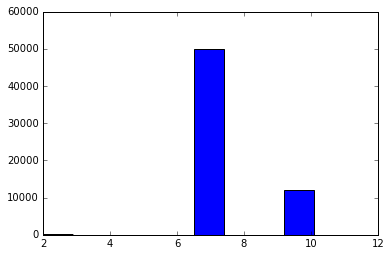

In [5]:
#Plot results

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(preds)

#Unique Countries in data set
pd.DataFrame({'code': np.unique(preds),'country':np.unique(le.inverse_transform(preds))})

In [74]:
results = pd.DataFrame({'country':le.inverse_transform(preds),'id':df_test.index})
results.to_csv('initial_submission.csv')